### Spot the difference
Some python code to compare two images pixel by pixel.
We will use the Structural Similarity Index (SSIM) to spot the difference between two images

In this notebook you will:

Visualize two images you want to compare
Run a spot the difference function to compute images similarity and the number of detected differences
Visualize the differences of the images (filled image, mask image)

In [27]:
import numpy as np
import cv2
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from skimage.metrics import structural_similarity
%matplotlib inline

In [29]:
print("Today:", datetime.now())

Today: 2024-07-26 22:40:54.817272


In [31]:
import sys
print("Python version:", sys.version)

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [64]:
import errno
import os

 

In [66]:
RES_DIR = 'outputs'

if not os.path.exists(RES_DIR):  # Only if dir not exist
    print("Dir:", RES_DIR, "does not exist.")
    print("So let's create dir:", RES_DIR)
    os.mkdir(RES_DIR)
    print("Done")

else:
    print("Dir:", RES_DIR, "exist. So let's use it.")

Dir: outputs does not exist.
So let's create dir: outputs
Done


In [68]:
def check_image(image1, image2):
    # To check if images exist
    from os.path import exists
    
    if exists(image1) and exists(image2):
        print("Files are available. Images should have the same shape")
        img1 = cv2.imread(image1)
        img2 = cv2.imread(image2)
        print("Image file 1:", image1, " shape =", img1.shape)
        print("Image file 2:", image2, " shape =", img2.shape)
        
    else:
        print("Error!")
        if not exists(image1):
            print(image1, ' is not available')
        if not exists(image2):
            print(image2, ' is not available')

In [70]:
def side_by_side_images(image1, image2, w, h):
    # To display the two images side by side
    img1 = plt.imread(image1)
    img2 = plt.imread(image2)
    f, ax = plt.subplots(1, 2, figsize=(w, h))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[0].set_title("Image1:" + image1)
    ax[1].set_title("Image2:" + image2)

    title = 'Spot the difference between these two images.'

    f.suptitle(title, fontsize=18)
    plt.tight_layout()
    
    plt.savefig(RES_DIR + "/" + os.path.basename(image1).split('.')[0] + "_bothimages.jpg")
    plt.show()

In [72]:
 def spot_the_difference(image1, image2, minvalue):
    # To spot the difference between the two images
    
    # Settings
    green_color = (0, 255, 0)
    red_color = (0, 0, 255)
    cyan_color = (255, 255, 0)

    rect_color = red_color
    rect_size = 3
    txt_color = red_color
    txt_size = 6

    contour_color1 = green_color
    contour_color2 = cyan_color

    offset = 40

    # Loading images using OpencV
    img1 = cv2.imread(image1)
    img2 = cv2.imread(image2)

    print("Comparing images:", imagefile1, "and", imagefile2)

    # Switch to gray
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Computation of the structural similarity index
    (score, diff) = structural_similarity(img1_gray, img2_gray, full=True)

    print("\n\033[1;31;34mImage Similarity: {:.5f}%".format(score * 100))
    print("Image Difference: {:.5f}%".format(100 - score * 100))
    print('\033[0m')

    diff = (diff * 255).astype("uint8")
    diff_boxes = cv2.merge([diff, diff, diff])
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    # Contours
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    # Initial Mask image
    mask = np.zeros(img1.shape, dtype='uint8')
    filled_img = img2.copy()

    nb_differences = 0

    for c in contours:
        area = cv2.contourArea(c)
    
        if area > minvalue:
            txt = str(nb_differences + 1)
            x, y, w, h = cv2.boundingRect(c)
            
            # Adding rectangles, text and contours
            cv2.rectangle(img1, (x, y), (x + w, y + h), rect_color, rect_size)
            
            cv2.rectangle(img2, (x, y), (x + w, y + h), rect_color, rect_size)
            cv2.putText(img2, txt, (x, y + h + offset), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, txt_color, txt_size)
            
            cv2.drawContours(mask, [c], 0, contour_color1, -1)
            cv2.putText(mask, txt, (x, y + h + offset), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, txt_color, txt_size)
        
            cv2.drawContours(filled_img, [c], 0, contour_color2, -1)
            cv2.putText(filled_img, txt, (x, y + h + offset), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, txt_color, txt_size)

            # Saving images
            basename = os.path.basename(imagefile1).split('.')[0]
            image1 = RES_DIR + "/" + basename + "_image1.jpg"
            image2 = RES_DIR + "/" + basename + "_image2.jpg"
            maskimage = RES_DIR + "/" + basename + "_mask.jpg"
            filled_image = RES_DIR + "/" + basename + "_filled_img.jpg"

            cv2.imwrite(image1, img1)
            cv2.imwrite(image2, img2)
            cv2.imwrite(maskimage, mask)
            cv2.imwrite(filled_image, filled_img)
        
            nb_differences += 1
        
    print("\033[1;31;91m==> Number of differences =", nb_differences, '\033[0m')

    return image1, image2, maskimage, filled_image, nb_differences, score

In [74]:
def viewing_images(w, h):
    # To display the 4 images results
    
    print(datetime.now(), " Comparing image:", image1, "with", image2)
    print("\n", "-" * 50, "Results", "-" * 50, "\n")
    print("\033[1;31;91mNumber of differences =", nb_differences, "| similarity index =", score, '\033[0m')

    fig = plt.figure(figsize=(w, h))
    rows = columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image1), cv2.COLOR_BGR2RGB))
    plt.title("Initial image")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(image2), cv2.COLOR_BGR2RGB))
    plt.title("Second image")

    fig.add_subplot(rows, columns, 3)
    plt.imshow(cv2.cvtColor(cv2.imread(filled_image), cv2.COLOR_BGR2RGB))
    plt.title("Filled Image")

    fig.add_subplot(rows, columns, 4)
    plt.imshow(cv2.cvtColor(cv2.imread(maskimage), cv2.COLOR_BGR2RGB))
    plt.title("Mask Image")
    
    plt.savefig(RES_DIR + "/" + os.path.basename(imagefile1).split('.')[0] + "_all.jpg")

# NOW WE TAKE EXAMPLE FOR CHECK

In [77]:
imagefile1 = 'pic_1.jpg'
imagefile2 = 'pic_2.jpg'
check_image(imagefile1, imagefile2)

Files are available. Images should have the same shape
Image file 1: pic_1.jpg  shape = (738, 1040, 3)
Image file 2: pic_2.jpg  shape = (738, 1040, 3)


### FOR SIMILARITY ANDD DIFFERENCE

In [80]:
image1, image2, maskimage, filled_image, nb_differences, score = spot_the_difference(imagefile1, imagefile2, 50)

Comparing images: pic_1.jpg and pic_2.jpg

Image Similarity: 99.38827%
Image Difference: 0.61173%

==> Number of differences = 12 


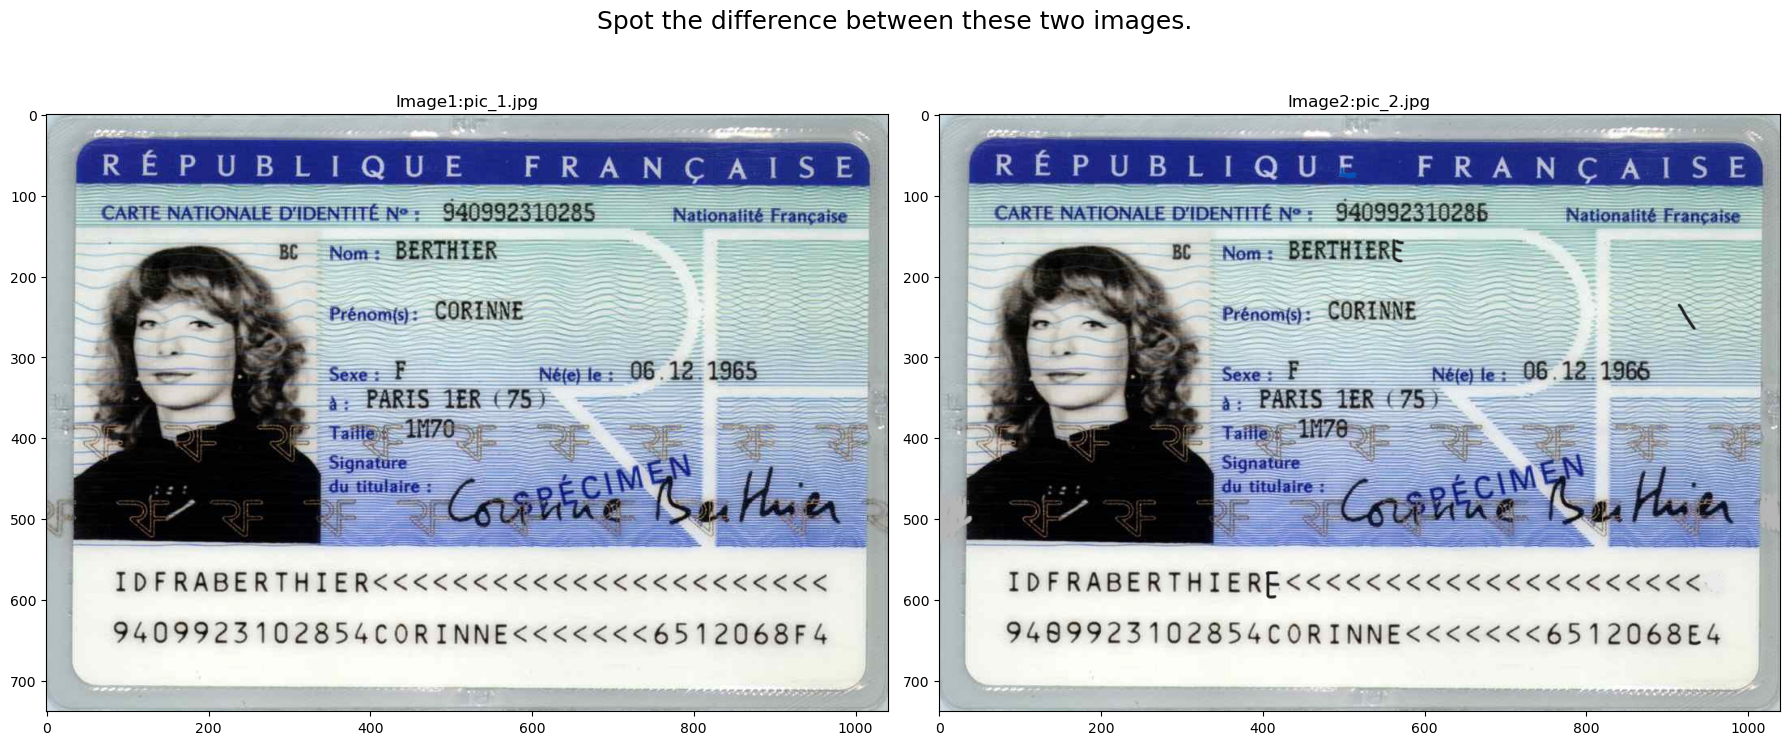

In [82]:
side_by_side_images(imagefile1, imagefile2, 18, 8)

2024-07-26 23:00:45.176992  Comparing image: outputs/pic_1_image1.jpg with outputs/pic_1_image2.jpg

 -------------------------------------------------- Results -------------------------------------------------- 

Number of differences = 12 | similarity index = 0.9938826612546015 


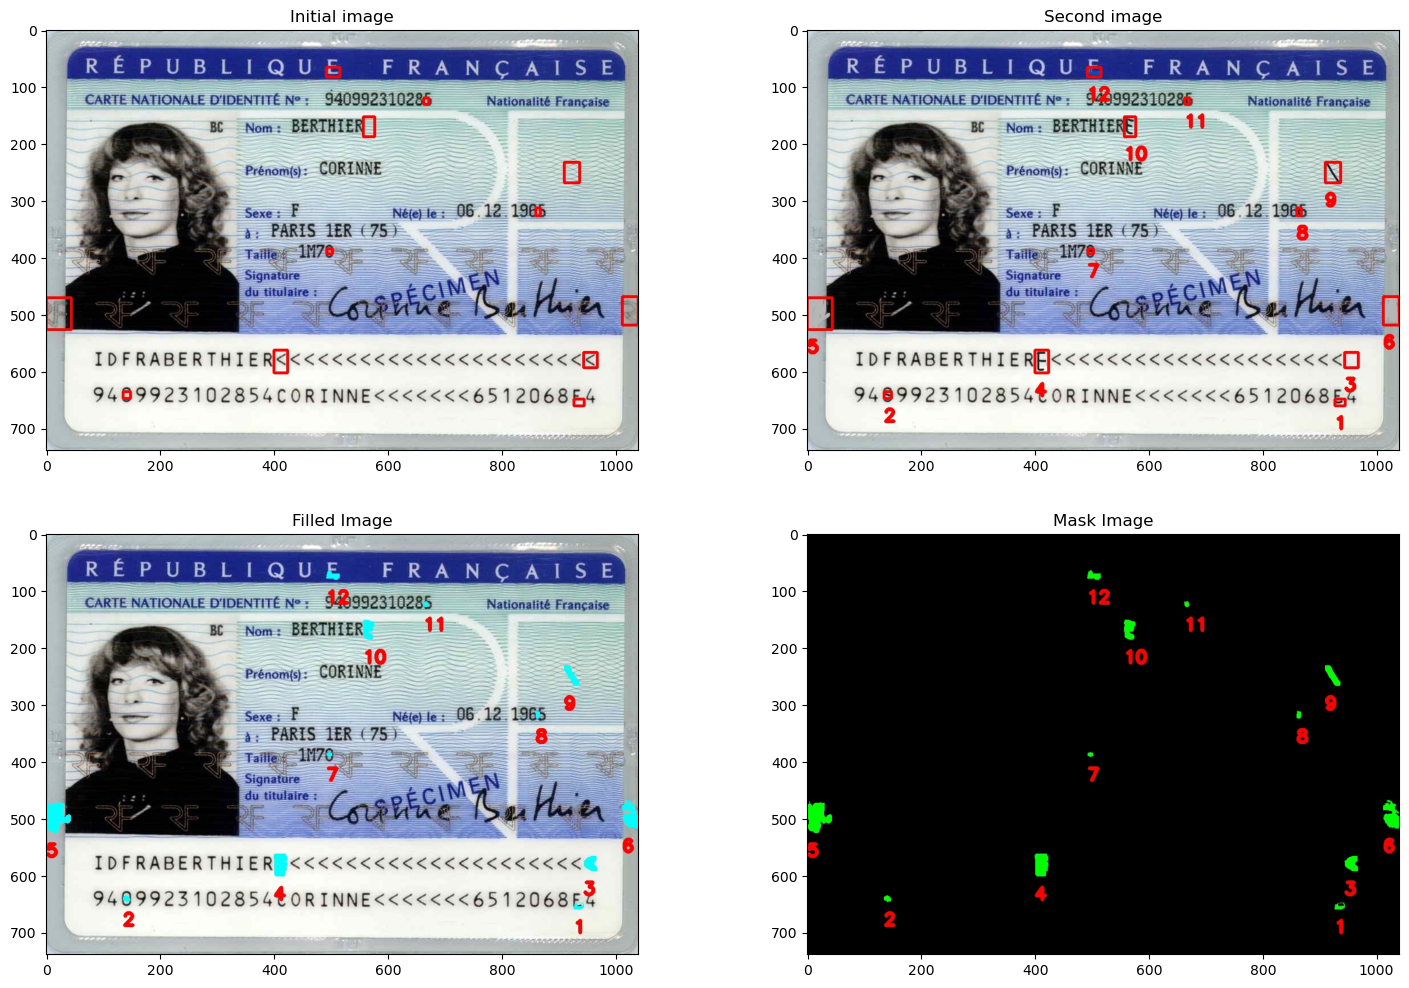

In [84]:
viewing_images(18, 12)

## EXAMPLE 2

In [87]:
imagefile1 = 'camels1.jpg'
imagefile2 = 'camels2.jpg'
check_image(imagefile1, imagefile2)

Files are available. Images should have the same shape
Image file 1: camels1.jpg  shape = (3000, 4501, 3)
Image file 2: camels2.jpg  shape = (3000, 4501, 3)


In [89]:
image1, image2, maskimage, filled_image, nb_differences, score = spot_the_difference(imagefile1, imagefile2, 50)

Comparing images: camels1.jpg and camels2.jpg

Image Similarity: 98.91657%
Image Difference: 1.08343%

==> Number of differences = 34 


In [91]:
side_by_side_images(imagefile1, imagefile2, 18, 8)

2024-07-26 23:11:35.883682  Comparing image: outputs/camels1_image1.jpg with outputs/camels1_image2.jpg

 -------------------------------------------------- Results -------------------------------------------------- 

Number of differences = 34 | similarity index = 0.9891656688476811 


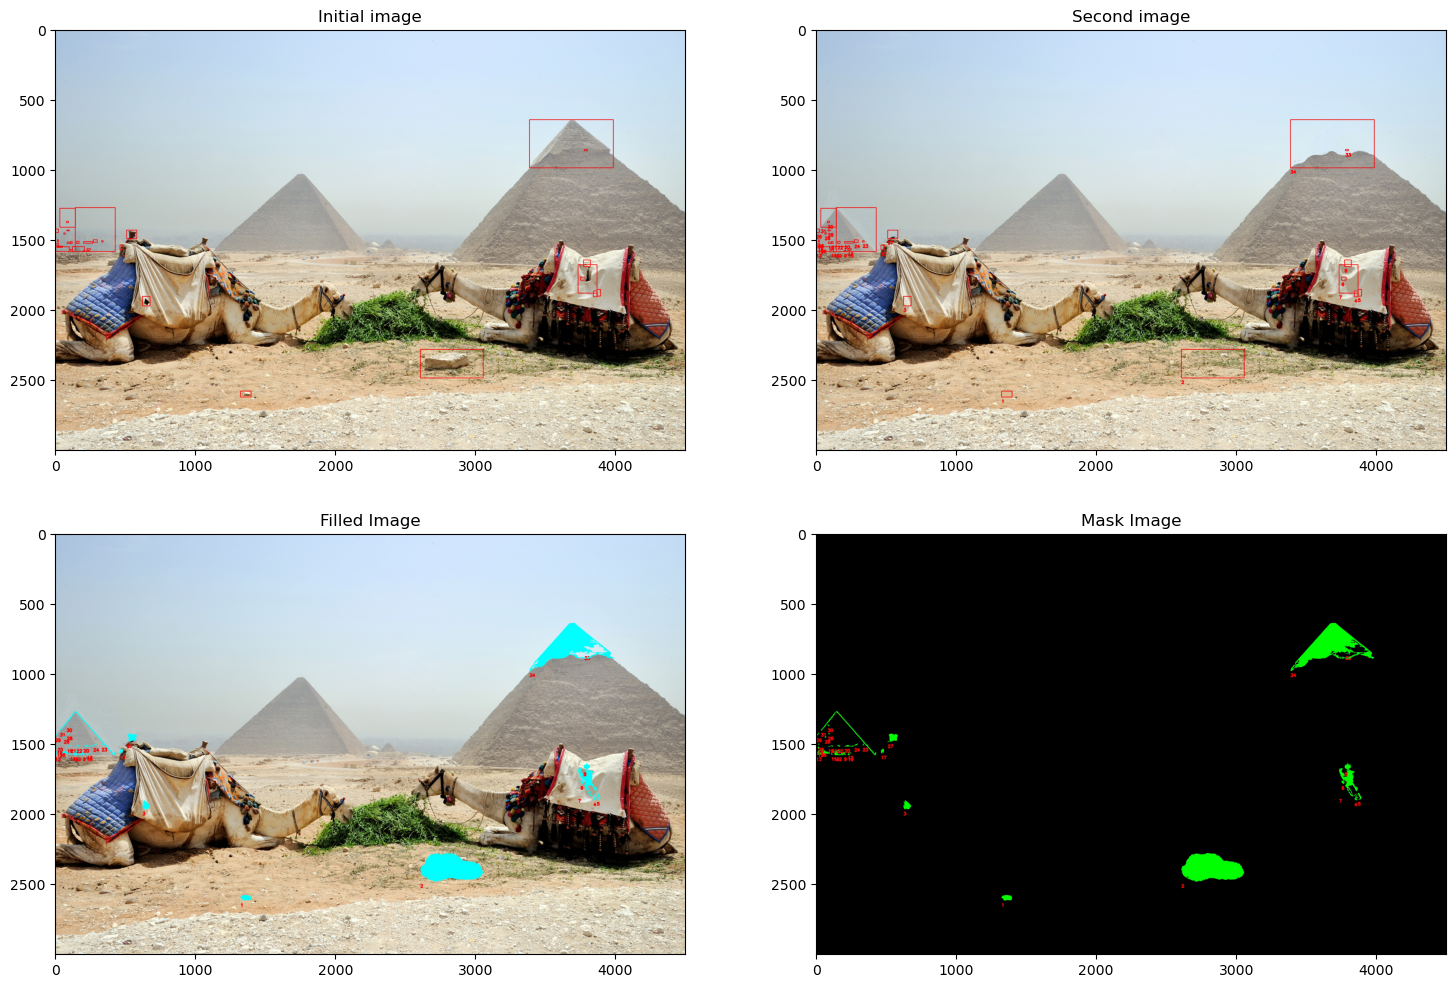

In [93]:
viewing_images(18, 12)